In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_excel('DS2_C5_S5_HR_Data_Practice.xlsx')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928


# TASK1

In [4]:
tz=pd.pivot_table(data=df[['left','salary']],index=df['salary'],columns='left',aggfunc='count')
tz

salary      
left        0     1
salary             
high     1155    82
low      5144  2172
medium   5129  1317

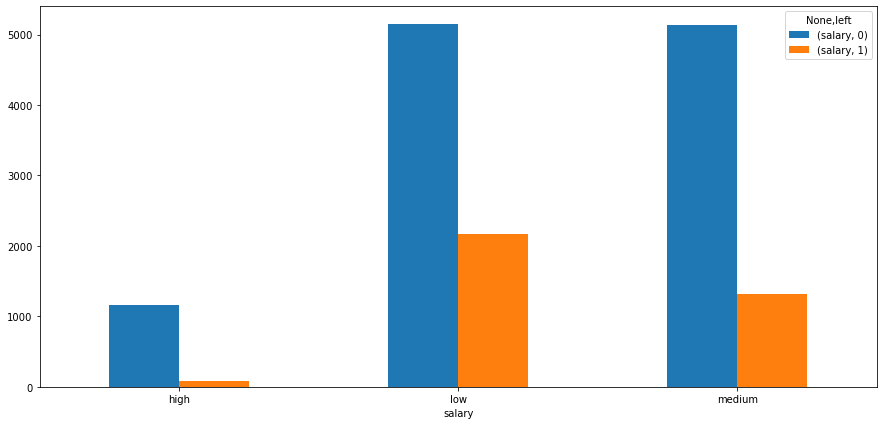

In [5]:
tz.plot.bar(rot=0,figsize=(15, 7));

In [6]:
tz=pd.pivot_table(data=df[['left','Department']],index=df['Department'],columns='left',aggfunc='count')
tz

Department      
left                 0     1
Department                  
IT                 954   273
RandD              666   121
accounting         563   204
hr                 524   215
management         539    91
marketing          655   203
product_mng        704   198
sales             3126  1014
support           1674   555
technical         2023   697

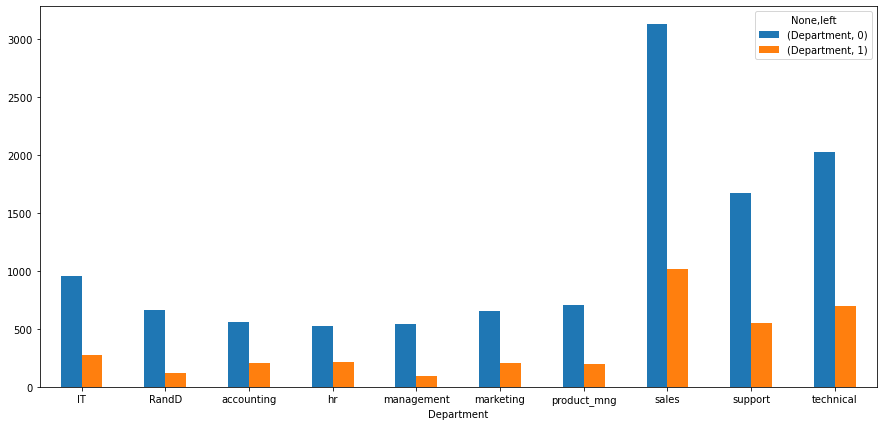

In [7]:

tz.plot.bar(rot=0,figsize=(15, 7));


# TASK2

In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928


In [9]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
salary_num               0
dtype: int64

### There is no null value

#### checking for relation

In [10]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.046656
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.022006
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.007598
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.006997
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.047869
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.006091
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.140561
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.091209
salary_num,0.046656,-0.022006,-0.007598,-0.006997,0.047869,0.006091,-0.140561,0.091209,1.000000


### from above both methods i can see (average_montly_hours,satisfaction_level,Work_accident,promotion_last_5years,promotion_last_5years) shows relation with respect to retension

## Convert Salary and department into numeric

In [11]:
label_encoder = preprocessing.LabelEncoder()

In [12]:
df['Department']= label_encoder.fit_transform(df['Department'])
df['salary']= label_encoder.fit_transform(df['salary'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [13]:
X=df_scaled.drop(['salary','left','salary_num'],axis=1)
y=df_scaled.salary_num
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,0.393725
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,0.393725
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,0.393725
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,0.393725
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,0.393725
...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.411165,-0.147412,0.742316
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.411165,-0.147412,0.742316
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.411165,-0.147412,0.742316
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.411165,-0.147412,0.742316


In [14]:
y

0       -0.760110
1        0.120742
2        0.311871
3       -0.692366
4       -0.572477
           ...   
14994   -0.746962
14995   -0.779474
14996   -0.515281
14997   -0.634603
14998   -0.304728
Name: salary_num, Length: 14999, dtype: float64

# TASK3

In [15]:
X_train,X_test,y_train, y_test= train_test_split(X,y,train_size=0.3)

In [16]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=3)

model.fit(X_train,y_train)
print("R-Squared on test dataset={}".format(model.score(X_test,y_test)))
print("R-Squaredon train dataset={}".format(model.score(X_train, y_train)))

R-Squared on test dataset=0.025474033134713192
R-Squaredon train dataset=0.049617304846769295


In [17]:
y_pred=model.predict(X_test)

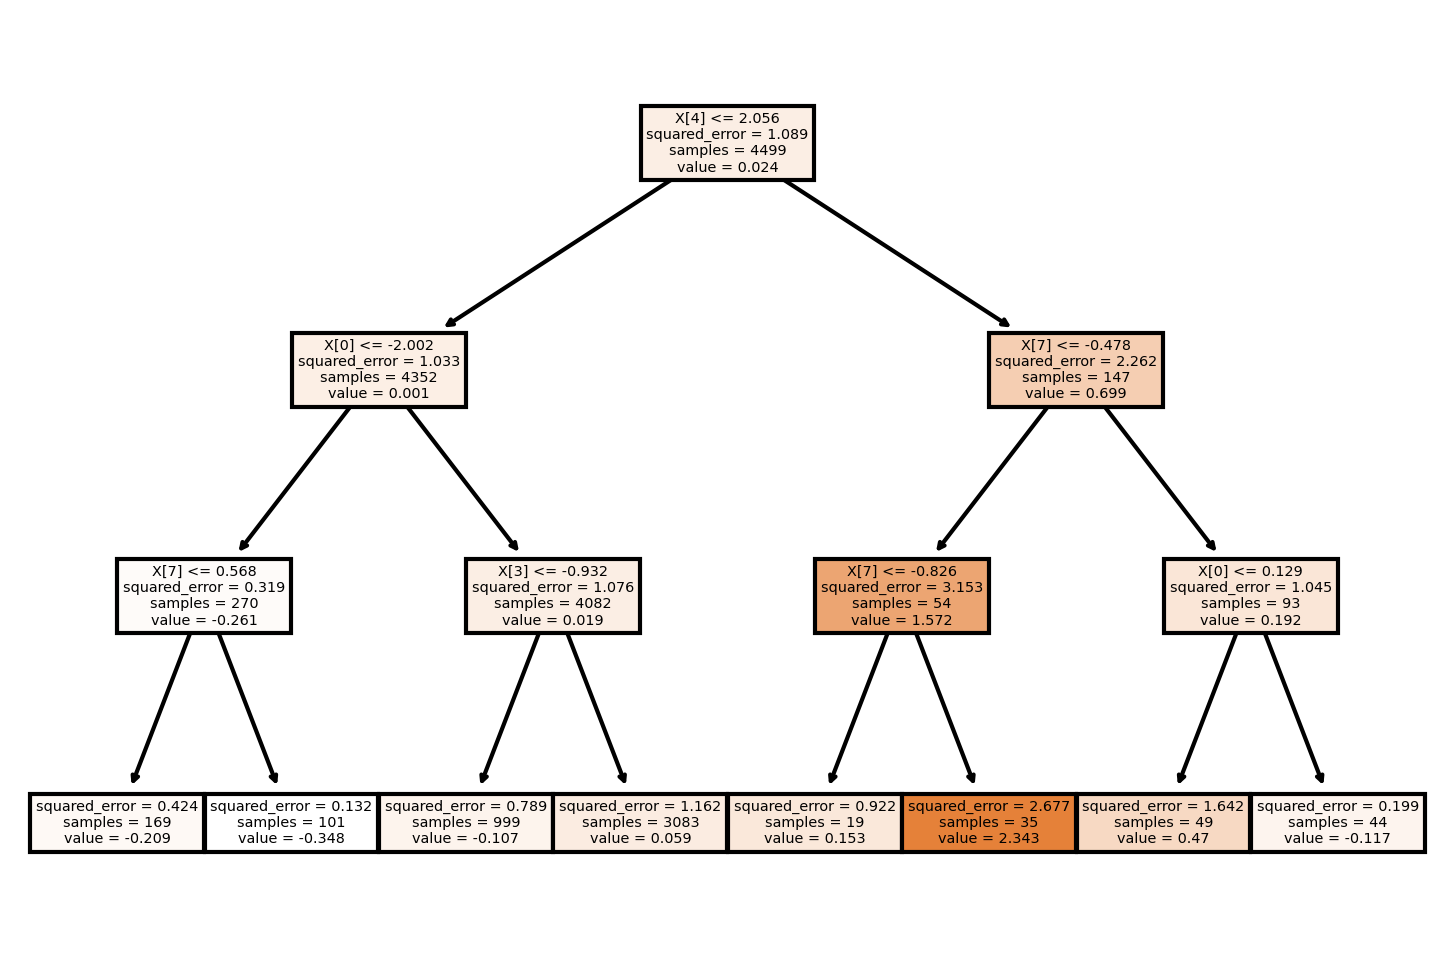

In [18]:
from sklearn import tree
#Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(dpi=300)

tree.plot_tree(model,filled = True);

#save figure in current directory as png
#fig.savefig('Bike_regression_decisiontree.png')

In [19]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [20]:
# We will try with max depth starting from 1 to 15 and depending on the final ‘rmse’ score choose the value of max_depth.
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import  tree

max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

skf=StratifiedKFold(n_splits=5,shuffle=True, random_state= 101)

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 101), X, y, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 1.00
For max depth: 2
rmse= 0.99
For max depth: 3
rmse= 0.99
For max depth: 4
rmse= 0.99
For max depth: 5
rmse= 0.99
For max depth: 6
rmse= 0.98
For max depth: 7
rmse= 0.99
For max depth: 8
rmse= 0.99
For max depth: 9
rmse= 1.00
For max depth: 10
rmse= 1.01
For max depth: 11
rmse= 1.03
For max depth: 12
rmse= 1.07
For max depth: 13
rmse= 1.09
For max depth: 14
rmse= 1.12
For max depth: 15
rmse= 1.14


# TASK4

In [21]:
X=df.drop(['salary','left'],axis=1)
y=df.salary
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary_num
0,0.38,0.53,2,157,3,0,0,7,4649
1,0.80,0.86,5,262,6,0,0,7,34126
2,0.11,0.88,7,272,4,0,0,7,40522
3,0.72,0.87,5,223,5,0,0,7,6916
4,0.37,0.52,2,159,3,0,0,7,10928


In [22]:
X_train,X_test,y_train, y_test= train_test_split(X,y,train_size=0.3)

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train,y_train)
print("R-Squared on test dataset={}".format(model.score(X_test,y_test)))
print("R-Squaredon train dataset={}".format(model.score(X_train, y_train)))

R-Squared on test dataset=1.0
R-Squaredon train dataset=1.0


In [24]:
y_pred=model.predict(X_test)
y_pred

array([1, 2, 1, ..., 1, 2, 2])

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[ 861    0    0]
 [   0 5116    0]
 [   0    0 4523]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       861
           1       1.00      1.00      1.00      5116
           2       1.00      1.00      1.00      4523

    accuracy                           1.00     10500
   macro avg       1.00      1.00      1.00     10500
weighted avg       1.00      1.00      1.00     10500



In [26]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
roc #
#help(roc_auc_score)

ValueError: multi_class must be in ('ovo', 'ovr')